In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
initial_dataset = pd.read_csv("../data/raw/filtered.tsv", sep="\t")

In [3]:
initial_dataset.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [4]:
initial_dataset = initial_dataset.drop(columns=initial_dataset.columns[0])
initial_dataset.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [5]:
print(initial_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577777 entries, 0 to 577776
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reference    577777 non-null  object 
 1   translation  577777 non-null  object 
 2   similarity   577777 non-null  float64
 3   lenght_diff  577777 non-null  float64
 4   ref_tox      577777 non-null  float64
 5   trn_tox      577777 non-null  float64
dtypes: float64(4), object(2)
memory usage: 26.4+ MB
None


In [6]:
toxicity_difference = (
    initial_dataset["ref_tox"].values - initial_dataset["trn_tox"].values
)

# Inference about toxicity score and toxicity score difference between ref and trn

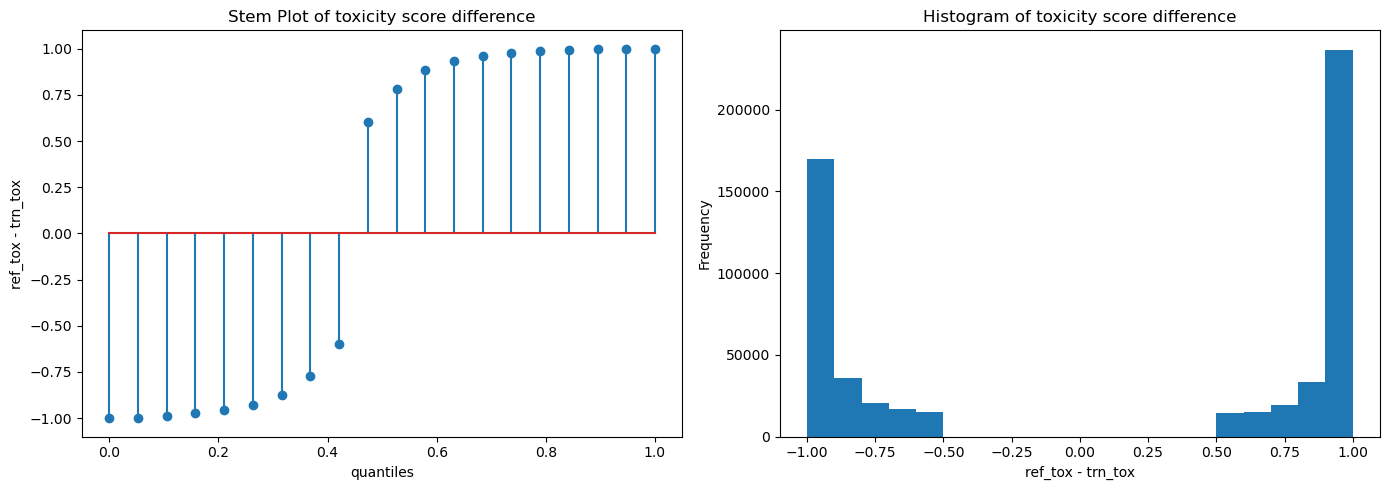

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

y_stem = np.quantile(a=toxicity_difference, q=np.linspace(0, 1, 20))
x_stem = np.linspace(0, 1, 20)

ax1.stem(x_stem, y_stem)
ax2.hist(toxicity_difference, bins=20)

ax1.set_xlabel("quantiles")
ax1.set_ylabel("ref_tox - trn_tox")
ax1.set_title("Stem Plot of toxicity score difference")

ax2.set_xlabel("ref_tox - trn_tox")
ax2.set_ylabel("Frequency")
ax2.set_title("Histogram of toxicity score difference")

plt.tight_layout()
plt.show()

# Inference about similarity

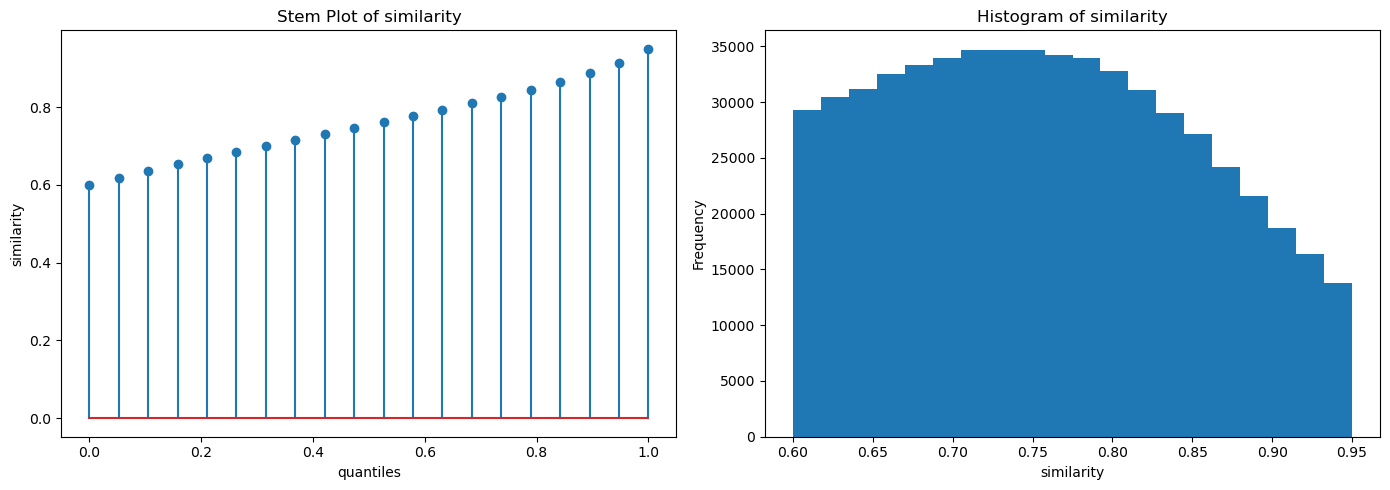

In [8]:
similarity = initial_dataset["similarity"].values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

y_stem = np.quantile(a=similarity, q=np.linspace(0, 1, 20))
x_stem = np.linspace(0, 1, 20)

ax1.stem(x_stem, y_stem)
ax2.hist(similarity, bins=20)

ax1.set_xlabel("quantiles")
ax1.set_ylabel("similarity")
ax1.set_title("Stem Plot of similarity")

ax2.set_xlabel("similarity")
ax2.set_ylabel("Frequency")
ax2.set_title("Histogram of similarity")

plt.tight_layout()
plt.show()

# Inference about len_diff

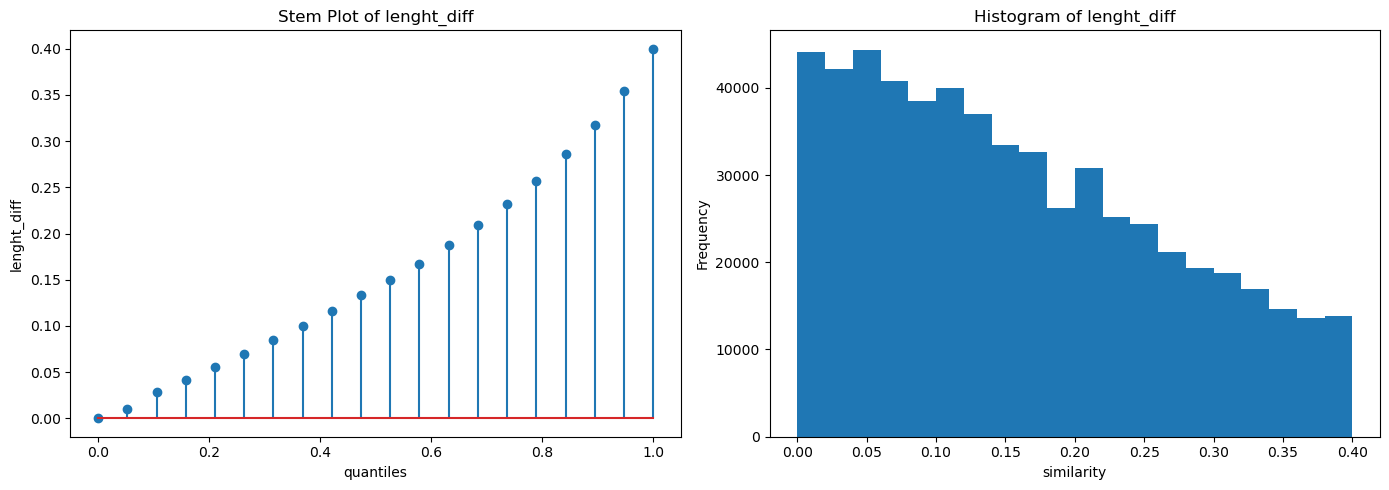

In [9]:
lenght_diff = initial_dataset["lenght_diff"].values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

y_stem = np.quantile(a=lenght_diff, q=np.linspace(0, 1, 20))
x_stem = np.linspace(0, 1, 20)

ax1.stem(x_stem, y_stem)
ax2.hist(lenght_diff, bins=20)

ax1.set_xlabel("quantiles")
ax1.set_ylabel("lenght_diff")
ax1.set_title("Stem Plot of lenght_diff")

ax2.set_xlabel("similarity")
ax2.set_ylabel("Frequency")
ax2.set_title("Histogram of lenght_diff")

plt.tight_layout()
plt.show()

# Inference about correlation between text similarity and difference in toxicity score

In [74]:
def groupping_v1(
    values: np.ndarray, number_of_quantiles
) -> tuple[list[str], dict[str, int]]:
    q_ = np.linspace(0, 1, number_of_quantiles)
    min_ = values.min()
    max_ = values.max()
    quantiles = np.quantile(a=values, q=q_[1:-1])
    labels = []
    for v in values:
        if v < quantiles[0]:
            labels.append("group_0")
        for i in range(1, len(quantiles)):
            if quantiles[i - 1] <= v < quantiles[i]:
                labels.append(f"group_{i}")
        if v > quantiles[-1]:
            labels.append(f"group_{len(quantiles)}")

    mapping_dict = {}
    mapping_dict["group_0"] = (round(min_, 4), round(quantiles[0],4))
    for i in range(1, len(quantiles)):
        mapping_dict[f"group_{i}"] = (round(quantiles[i-1],4), round(quantiles[i],4))
    mapping_dict[f"group_{len(quantiles)}"] = (round(quantiles[-1],4), round(max_, 4))

    return labels, mapping_dict

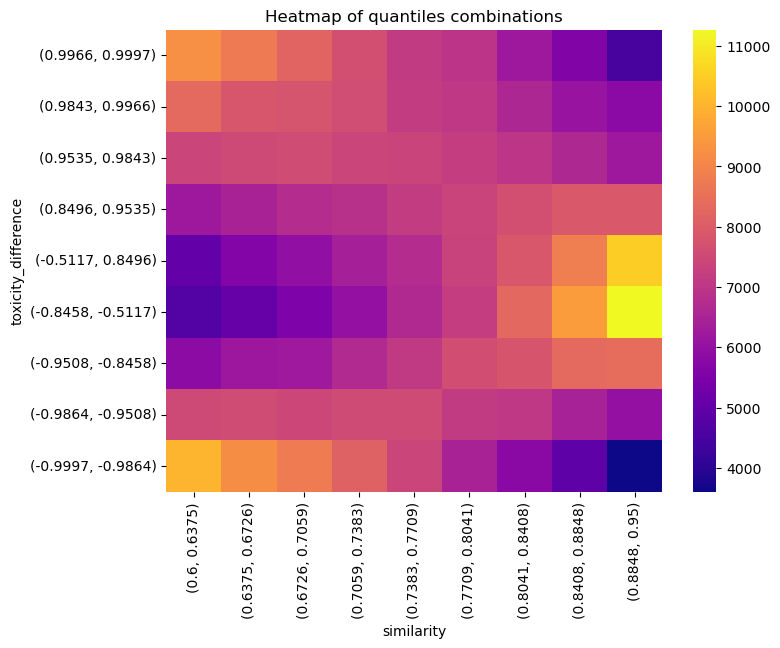

In [90]:
toxicity_difference_labels, toxicity_difference_mapping_dict = groupping_v1(
    toxicity_difference, 10
)
similarity_labels, similarity_mapping_dict = groupping_v1(similarity, 10)

len_ = min(len(toxicity_difference_labels), len(similarity_labels))

data_cross = {
    "toxicity_difference": toxicity_difference_labels[:len_],
    "similarity": similarity_labels[:len_],
}

df_cross = pd.DataFrame(data_cross)

freq_table = pd.crosstab(
    index=df_cross["toxicity_difference"],
    columns=df_cross["similarity"],
)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    freq_table,
    annot=False,
    cmap="plasma",
    cbar=True,
    xticklabels=[str(v) for v in similarity_mapping_dict.values()],
    yticklabels=[str(v) for v in toxicity_difference_mapping_dict.values()],
)
ax.invert_yaxis()
plt.title("Heatmap of quantiles combinations")
plt.xlabel("similarity")
plt.ylabel("toxicity_difference")

plt.show()

# Correlation between toxicity difference and length difference

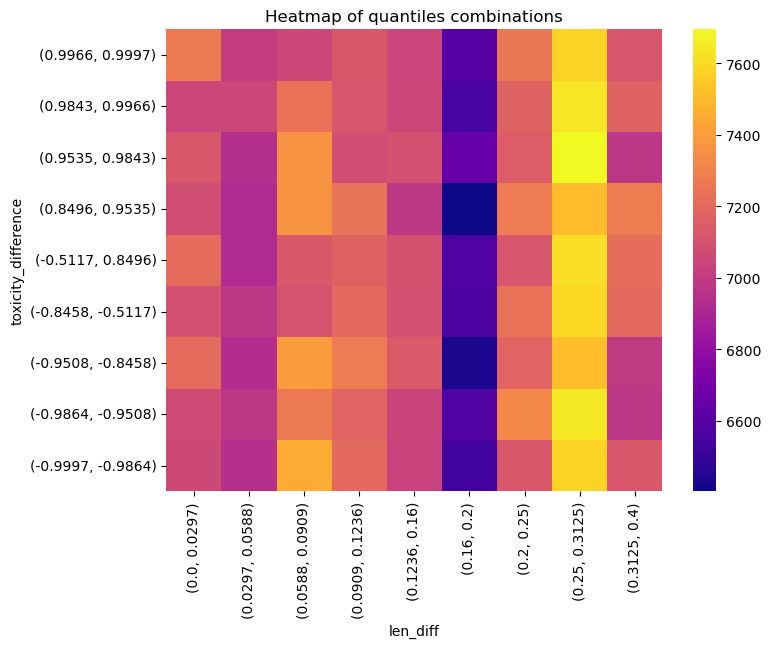

In [91]:
toxicity_difference_labels, toxicity_difference_mapping_dict = groupping_v1(
    toxicity_difference, 10
)

len_diff = initial_dataset["lenght_diff"]

len_diff_labels, len_diff_mapping_dict = groupping_v1(len_diff, 10)

len_ = min(len(toxicity_difference_labels), len(len_diff_labels))

data_cross = {
    "toxicity_difference": toxicity_difference_labels[:len_],
    "len_diff": len_diff_labels[:len_],
}

df_cross = pd.DataFrame(data_cross)

freq_table = pd.crosstab(
    index=df_cross["toxicity_difference"],
    columns=df_cross["len_diff"],
)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    freq_table,
    annot=False,
    cmap="plasma",
    cbar=True,
    xticklabels=[str(v) for v in len_diff_mapping_dict.values()],
    yticklabels=[str(v) for v in toxicity_difference_mapping_dict.values()],
)
ax.invert_yaxis()
plt.title("Heatmap of quantiles combinations")
plt.xlabel("len_diff")
plt.ylabel("toxicity_difference")

plt.show()

In [37]:
# Create a sample dataset
data = {
    "Label1": ["A", "A", "A", "B", "B", "C", "C", "C", "C"],
    "Label2": ["X", "Y", "Y", "X", "Y", "X", "X", "Y", "Z"],
}

df = pd.DataFrame(data)

# Create a frequency table using pandas' crosstab() function
freq_table = pd.crosstab(df["Label1"], df["Label2"])

freq_table
# Create a heatmap using seaborn
# plt.figure(figsize=(8, 6))
# sns.heatmap(freq_table, annot=True, cmap='viridis', cbar=False)
# plt.title('Heatmap of Label Combinations')
# plt.xlabel('Label2')
# plt.ylabel('Label1')

# # Show the plot
# plt.show()

Label2,X,Y,Z
Label1,,,
A,1,2,0
B,1,1,0
C,2,1,1


In [38]:
freq_table_v1 = freq_table.sort_index(axis=1, ascending=False)
freq_table_v1

Label2,Z,Y,X
Label1,,,
A,0,2,1
B,0,1,1
C,1,1,2


In [39]:
freq_table_v1.sort_index(ascending=False)

Label2,Z,Y,X
Label1,,,
C,1,1,2
B,0,1,1
A,0,2,1


In [38]:
# diff -1 -> 1
# sim  0 -> 1

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 700x500 with 1 Axes>